In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [79]:
plt.style.use('seaborn')

In [94]:
X_Train = pd.read_csv("Logistic_X_Train.csv")
Y_Train = pd.read_csv("Logistic_Y_Train.csv")
X_Test = pd.read_csv("Logistic_X_Test.csv")
#Y_test = pd.read_csv("SampleOutput.csv")

X_Train = X_Train.values
Y_Train = Y_Train.values
X_Test = X_Test.values
Y_Train = Y_Train.reshape((-1,))
#X_test = X_test.values
#Y_test = Y_test.values

In [95]:
print(X_Train.shape)
print(Y_Train.shape)
print(X_Test.shape)

(3000, 3)
(3000,)
(1000, 3)


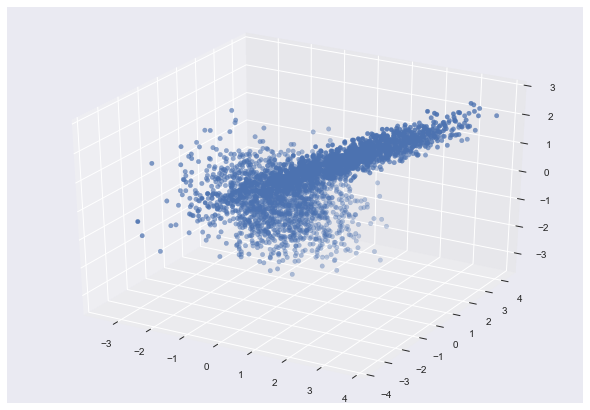

In [96]:
# Data Visualize
fig = plt.figure() 
axes = Axes3D(fig) 
axes.scatter(X_Train[:,0],X_Train[:,1],X_Train[:,2], cmap='rainbow')
plt.show()

In [97]:
def hypothesis(x,w,b):
    h = np.dot(x,w) + b
    return sigmoid(h)

def sigmoid(z):
    return 1.0/(1.0 + np.exp(-1.0*z))

def error(y_true,x,w,b):
    m = x.shape[0]
    
    err = 0.0
    
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        err += y_true[i]*np.log2(hx) + (1-y_true[i])*np.log2(1-hx)
    #print(err/m)
    return -err/m

def get_grads(y_true,x,w,b):
    
    grad_w = np.zeros(w.shape)
    grad_b = 0.0
    
    m = x.shape[0]
    
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        
        grad_w += (y_true[i] - hx)*x[i]
        grad_b += (y_true[i] - hx)
        
    grad_b /= m
    grad_w /= m
    
    return [grad_w, grad_b]


def gradient_descent(x,y_true,w,b,learning_rate=0.1):
    
    err = error(y_true,x,w,b)
    [grad_w, grad_b] = get_grads(y_true,x,w,b)
    
    w = w + learning_rate * grad_w
    b = b + learning_rate * grad_b
    
    return err,w,b

def predict(x,w,b):
    
    confidence = hypothesis(x,w,b)
    if confidence < 0.5:
        return 0
    else:
        return 1
    
def get_acc(x_tst, y_tst,w,b):
    y_pred = []
    for i in range(y_tst.shape[0]):
        p = predict(x_tst[i],w,b)
        y_pred.append(p)
        
    y_pred = np.array(y_pred)
    
    return float((y_pred == y_tst).sum())/y_tst.shape[0]
        


    

In [98]:
loss = []
acc = []

W = 2*np.random.random((X_train.shape[1],))
b = 5*np.random.random()

print(W,b)

[1.68892647 1.93889608 1.79623071] 4.984096915293896


In [99]:
for i in range(100):
    l,W,b = gradient_descent(X_Train,Y_Train,W,b,learning_rate=0.5)
    #acc.append(get_acc(X_Train,Y_Train,W,b))
    loss.append(l)
print(loss)

[7.809202841108057, 6.937667429811879, 6.099807387880747, 5.291904676269709, 4.508606918413703, 3.744534611728024, 2.997539616096798, 2.2784770686165094, 1.6448254538365439, 1.2135934127847687, 0.9812814895327971, 0.8470597884098668, 0.7582874903953633, 0.6936441653793425, 0.6434212211902245, 0.6026048956341475, 0.5683397848345767, 0.5388731438670002, 0.5130640313687888, 0.49013386373371837, 0.4695302863271034, 0.4508484521747263, 0.4337832638173304, 0.41809920899131164, 0.40361064290207976, 0.39016851089012394, 0.37765117282555527, 0.36595791508902226, 0.35500426828010584, 0.3447185655585892, 0.3350393706250097, 0.3259135264211124, 0.31729465421919867, 0.3091419844410478, 0.3014194351795886, 0.2940948780211572, 0.28713954714550693, 0.2805275592092026, 0.27423551974627736, 0.2682421977695091, 0.2625282546091478, 0.25707601624700366, 0.2518692808110636, 0.24689315471153328, 0.24213391228036002, 0.23757887483492846, 0.23321630590385678, 0.22903531998804375, 0.22502580272680295, 0.2211783

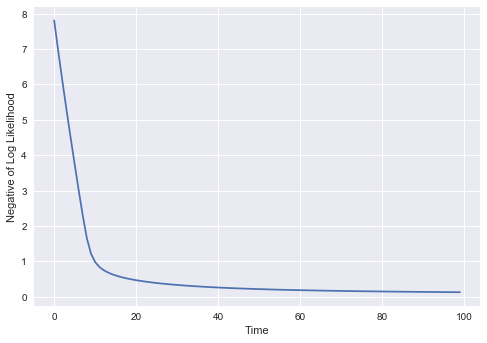

In [100]:
plt.plot(loss)
plt.ylabel("Negative of Log Likelihood")
plt.xlabel("Time")
plt.show()

In [105]:
n = X_Test.shape[0]
Y_Pred = []
for i in range(n):
    p = predict(X_Test[i],W,b)
    Y_Pred.append(p)
    
print(len(Y_Pred))
    

1000


In [ ]:
# Saving File
df = pd.DataFrame(data=Y_Pred,columns=["label"])
df.to_csv("Logistic_Y_Pred.csv", label=False)